In [3]:
#!pip install pandas matplotlib seaborn scikit-learn
#conda install ipykernel

In [4]:
import pandas as pd
print("Notebook is working! 🎉")

Notebook is working! 🎉


## 1. Project Overview
- Predict customer churn for a fictional telco/banking product
- Binary classification problem (churned vs. retained)

## 2. Load & Preview Data

In [39]:
import os
os.getcwd()

'c:\\Tibi\\Programing\\career_plan\\career-next-step\\customer_churn_prediction\\notebooks'

In [5]:
# Load the CSV
df = pd.read_csv("../data/Telco Customer Churn.csv")

# Quick preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Quick info
df.info()
df.isnull().sum().sort_values(ascending=False)

# Conclusion: no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [8]:
# Quick describe
df.describe(include='all')

# Conclusion: customerID appears to be a unique identifier. Most features are categorical, with only MonthlyCharges and tenure standing out as continuous numerical variables. This gives us a clearer view of which columns may require encoding or scaling later.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 3. Exploratory Data Analysis (EDA)

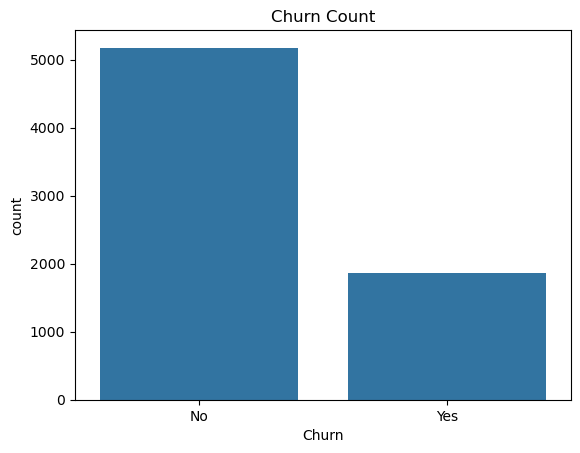

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='Churn')
plt.title('Churn Count')
plt.show()



### Conclusion

**Target Imbalance:** The distribution of the Churn variable is imbalanced, with significantly more customers not churning (roughly 5:2 ratio). 
This suggests the need for careful consideration during model training to handle potential class imbalance
(e.g., using techniques like oversampling, undersampling, or using appropriate evaluation metrics like precision, recall, or F1-score).

In [42]:
#lets have a look at the imbalance over the different categories we have

def plot_categorical_with_percentages(data, column):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=data, x=column, hue='Churn')
    
    # Get the labels of the categories
    category_labels = data[column].unique()
    
    # Loop through each category and add percentage annotations
    for p in ax.patches:
        
        height = p.get_height()

        if height == 0:
            continue
        # print(p)
        # Get the x position of the patch and convert it to the corresponding category
        category_position = int(p.get_x() + p.get_width())
    
        category_label = category_labels[category_position]
        
        # Filter data to get the total number of records for this category
        total_in_category = len(data[data[column] == category_label])
        
        # Calculate the percentage of churn in this category
        percentage = f'{100 * height / total_in_category:.1f}%'
        
        # Annotate the bar with the percentage
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                    textcoords='offset points')

    plt.title(f'Churn by {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../outputs/visuals/churn_by_{column}.png')
    plt.show()

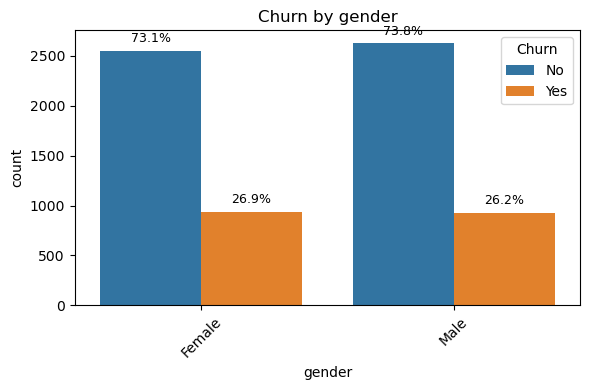

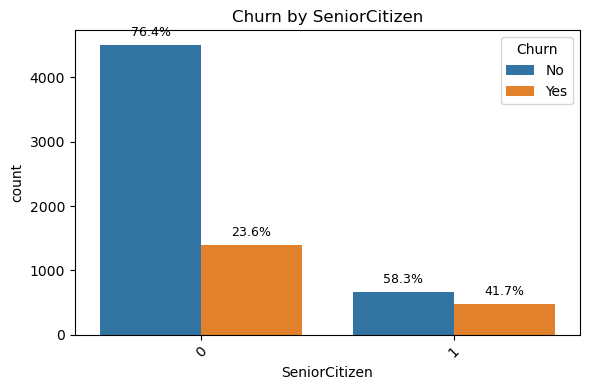

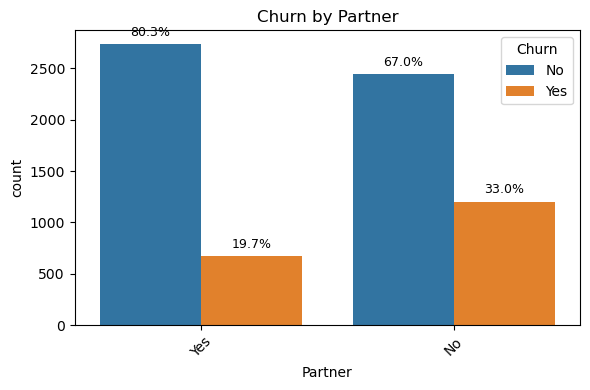

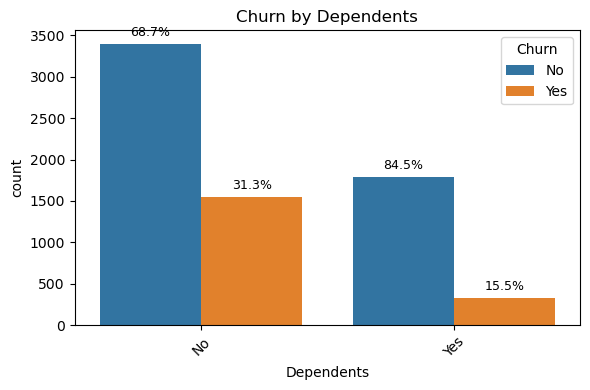

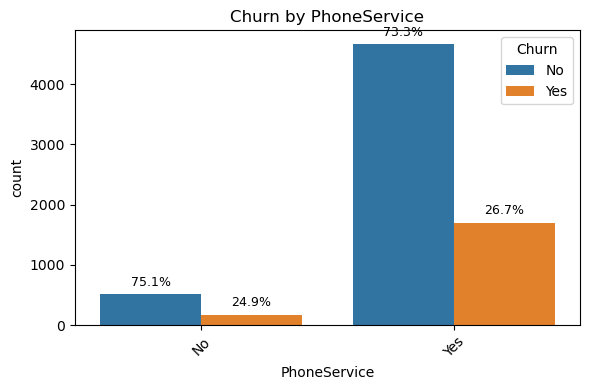

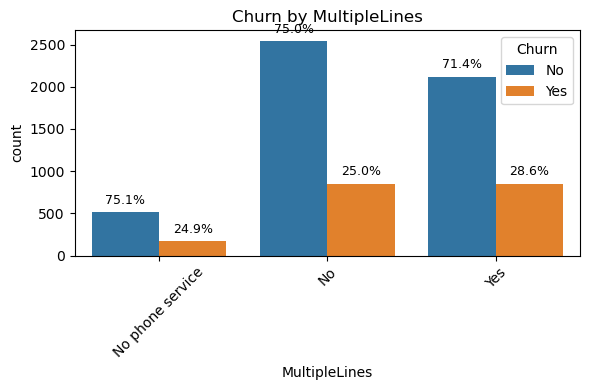

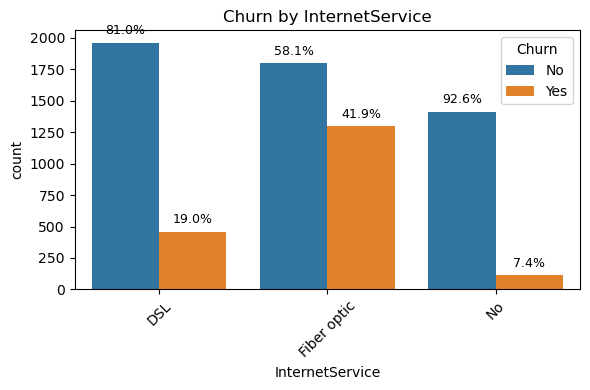

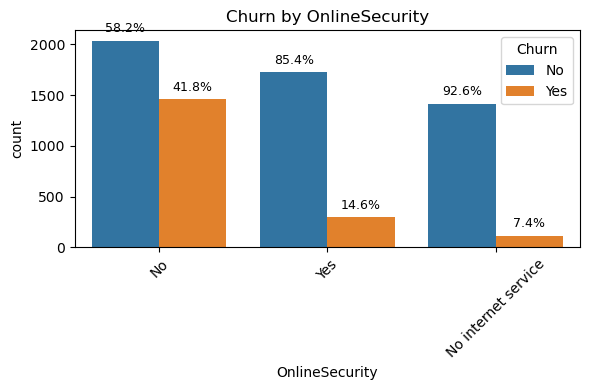

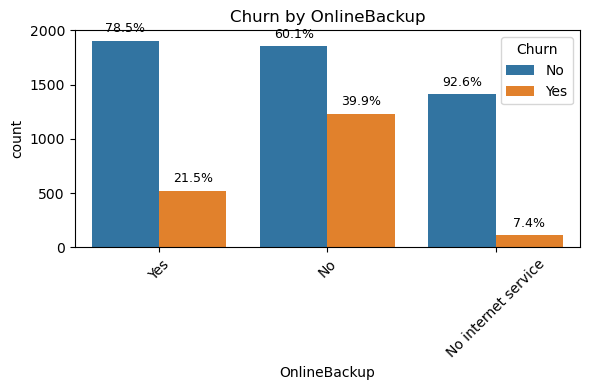

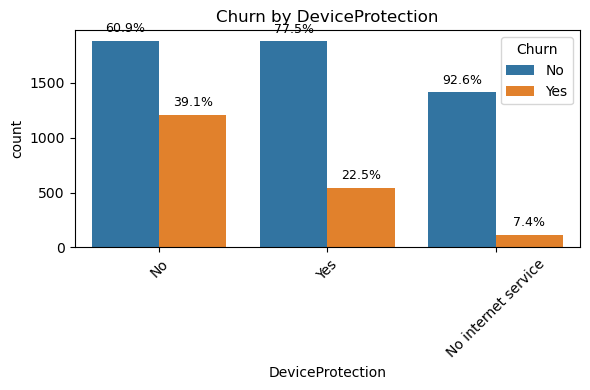

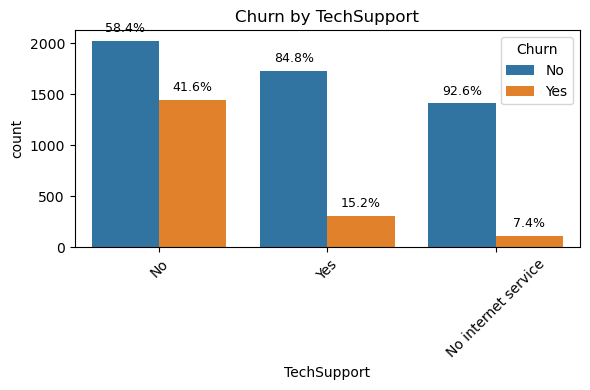

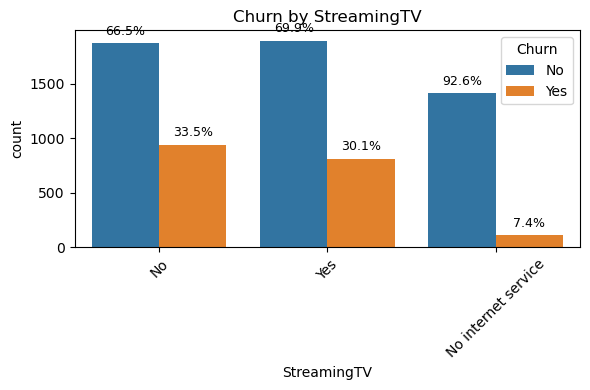

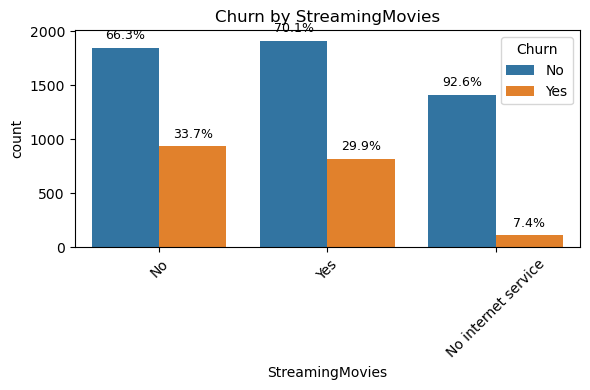

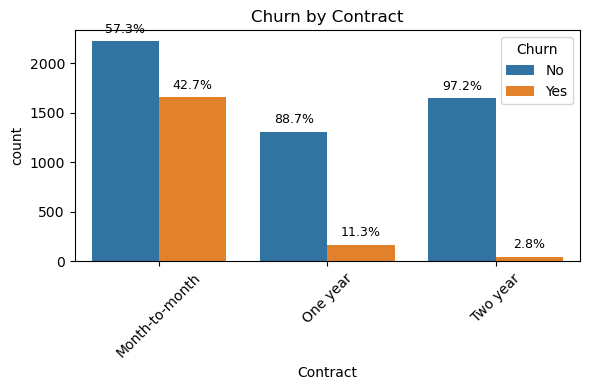

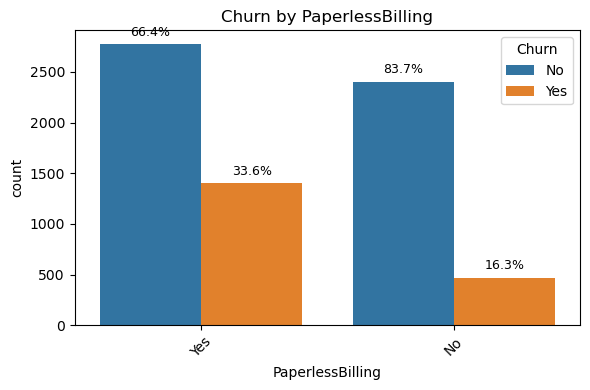

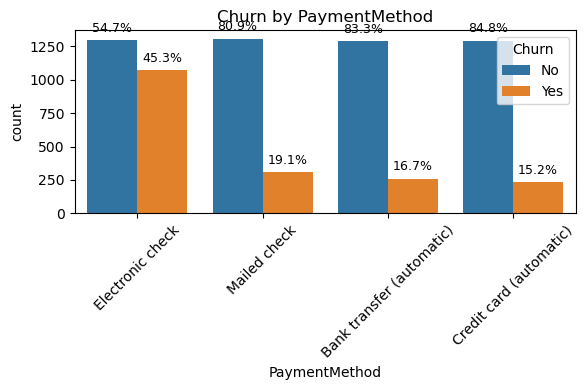

In [43]:
#lets have a look at the imbalance over the different categories we have

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plot_categorical_with_percentages(df, col)

### 📌 Churn Patterns Observed in Categorical Variables

- **Payment Method & Billing**  
  Customers using the *Electronic Check* method exhibit a significantly higher churn rate (45%) compared to other payment methods (15–19%). Similarly, customers with *Paperless Billing* have a churn rate of 33.6%, which is more than double that of customers receiving paper bills (16.3%). In both cases, the sample sizes are comparable, indicating that these trends are not driven by volume.

- **Contract Type**  
  Churn rates strongly correlate with contract length. Customers on a *month-to-month* plan churn at a rate of 42.7%, compared to 11.3% for *one-year* contracts and just 2.8% for *two-year* contracts. While the volume of customers differs across these categories, none of them are too small to be considered insignificant.

- **Streaming Services**  
  *Streaming TV* and *Streaming Movies* do not show meaningful differences in churn, with approximately 30% churn regardless of service subscription. However, customers with *No Internet Service* show a much lower churn rate (7.4%), suggesting a potentially distinct customer segment.

- **Value-Added Services**  
  The presence of services like *Tech Support*, *Device Protection*, *Online Backup*, and *Online Security* is consistently associated with lower churn. Customers without these services churn at rates near 40%, while those with them churn closer to 20%. Similarly, *Internet Service Type* shows a pattern: customers with *DSL* churn less than those with *Fiber Optic*, and those with *No Internet Service* churn the least.

- **Demographics**  
  *Gender*, *Phone Service*, and *Multiple Lines* do not appear to significantly affect churn. In contrast, having a *Partner* or *Dependents* is associated with reduced churn. *Senior Citizens* have a noticeably higher churn rate, although they represent a smaller portion of the dataset.

## 4. Data Cleaning & Preprocessing

## 5. Feature Engineering

## 6. Model Training

## 7. Model Evaluation

## 8. Insights & Next Steps